group                                 -0.809034
OverlapPROmeanPrimaryAmplitude_ang    -0.057503
overlapPROmeanPrimaryLatency           0.025090
OverlapPROmeanAvgVelocity              0.090001
GAP1PROmeanError                      -0.363437
overlapptoImeanFirstGain               0.237649
Gap1ANTImeanAcuracy                    0.361006
OverlapPROmeanPeakVelocity             0.000039
overlapPROmeannotCorrected            -0.497489
overlapPROmeannoRrespond              -0.399051
OverlapANTImeanPrimaryAmplitude_ang   -0.157589
overlapANTImeanPrimaryLatency         -0.502057
OverlapANtimeanAvgVelocity             0.063595
GAP1ANTImeanError                     -0.450683
overlapANTimeanFirstGain               0.482564
GAPPROmeanAcuracy                      0.272261
OverlapANTImeanPeakVelocity           -0.095338
overlapANTImeannotCorrected           -0.520131
OverlapANTImeannoRrespond             -0.660870
GapPROmeanPrimaryAmplitude_ang         0.085834
GapPROmeanPrimaryLatency              -0

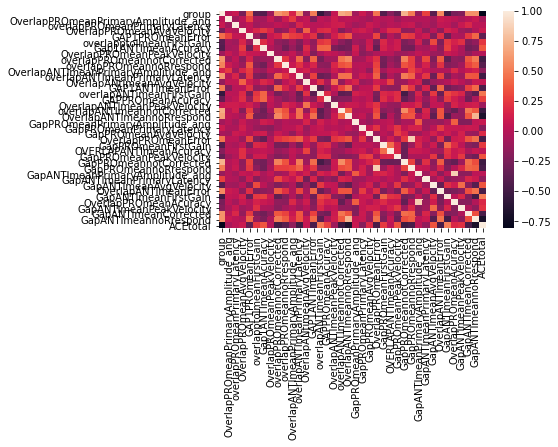

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score

missing_value=["?", " "]
data1= pd.read_csv("data/pen.pencile.csv",na_values=missing_value, delimiter=",")
data1.dropna(inplace = True)
data= pd.read_csv("data/eye-tracking.csv",na_values=missing_value, delimiter=",")
data.dropna(inplace = True)
data['ACEtotal'] = data1['ACEtotal']
Var_Corr = data.corr()

# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns)
print(Var_Corr['ACEtotal'])
print(np.sort(Var_Corr['ACEtotal']))

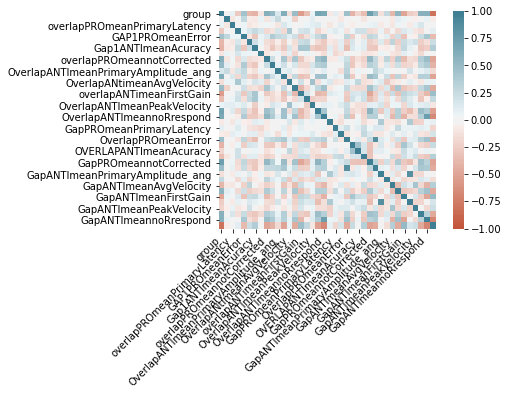

In [3]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [4]:
corr.style.background_gradient(cmap='coolwarm')

In [5]:
def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

In [6]:
def shan_entropy(c):
    c_normalized = c / float(np.sum(c))
    c_normalized = c_normalized[np.nonzero(c_normalized)]
    H = -sum(c_normalized* np.log2(c_normalized))  
    return H

# A = np.array([[ 2.0,  140.0,  128.23, -150.5, -5.4  ],
#               [ 2.4,  153.11, 130.34, -130.1, -9.5  ],
#               [ 1.2,  156.9,  120.11, -110.45,-1.12 ]])

A = data.values[:,1:].astype(float)

bins = data.shape # ?
n = A.shape[1]
matMI = np.zeros((n, n))

for ix in np.arange(n):
    for jx in np.arange(ix+1,n):
        matMI[ix,jx] = calc_MI(A[:,ix], A[:,jx], bins)
matMI = pd.DataFrame(matMI)
matMI.columns = (data.columns.values[1:])
print(matMI)
# matMI.style.background_gradient(cmap='coolwarm')        


    OverlapPROmeanPrimaryAmplitude_ang  overlapPROmeanPrimaryLatency  \
0                                  0.0                      2.604394   
1                                  0.0                      0.000000   
2                                  0.0                      0.000000   
3                                  0.0                      0.000000   
4                                  0.0                      0.000000   
5                                  0.0                      0.000000   
6                                  0.0                      0.000000   
7                                  0.0                      0.000000   
8                                  0.0                      0.000000   
9                                  0.0                      0.000000   
10                                 0.0                      0.000000   
11                                 0.0                      0.000000   
12                                 0.0                      0.00

In [7]:
n = A.shape[1]
matMI = np.zeros((n, n))

for ix in np.arange(n):
    for jx in np.arange(ix+1,n):
        matMI[ix,jx] = normalized_mutual_info_score(A[:,ix], A[:,jx])
matMI = pd.DataFrame(matMI)
matMI.columns = (data.columns.values[1:])
print(matMI)
# matMI.style.background_gradient(cmap='coolwarm')        


    OverlapPROmeanPrimaryAmplitude_ang  overlapPROmeanPrimaryLatency  \
0                                  0.0                      0.964708   
1                                  0.0                      0.000000   
2                                  0.0                      0.000000   
3                                  0.0                      0.000000   
4                                  0.0                      0.000000   
5                                  0.0                      0.000000   
6                                  0.0                      0.000000   
7                                  0.0                      0.000000   
8                                  0.0                      0.000000   
9                                  0.0                      0.000000   
10                                 0.0                      0.000000   
11                                 0.0                      0.000000   
12                                 0.0                      0.00